# Using ML Techniques for Detecting Type II Diabetes

**Eelis KOSTIAINEN, Khristen THORNBURG**

# Import Data
The data for the analysis of Diabetes is from kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database). Import data for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
np.random.seed(0)
sns.set()
MMOL_PER_LITRE_CONSTANT = 0.0555

# Cleaning of Data


In [2]:
pima_df = pd.read_csv('./diabetes_indians.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# The following fields cannot physically be zero: BMI, Glucose, BloodPressure, SkinThickness

def replace_with_median(df, key, value=0):
    column = df[key].copy()
    outer = column[~(column==value)]
    return column.replace(value, outer.mean())

def sanitize_data(df):
    data = df.copy()
    data['BMI'] = replace_with_median(data, 'BMI')
    data['BloodPressure'] = replace_with_median(data, 'BloodPressure')
    data['SkinThickness'] = replace_with_median(data, 'SkinThickness')
    data['Glucose'] = replace_with_median(data, 'Glucose')
    # Prefer mmol/l over mg/Dl
    data['Glucose'] = data['Glucose'] * MMOL_PER_LITRE_CONSTANT
    
    return data

pima_df = sanitize_data(pima_df)
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,6.753615,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,1.689195,12.096346,8.790942,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,2.442000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,5.536125,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,6.493500,72.202592,29.153420,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,7.783875,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,11.044500,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
german_df = pd.read_csv('./diabetes_german.csv')
german_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


The german data is identical to the Pima Indian data. Let's sanitize it with the same procedure.

In [6]:
german_df = sanitize_data(german_df)
german_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,6.769631,72.403665,29.341275,80.254000,32.650101,0.470930,33.090500,0.342000
std,3.306063,1.694588,11.949531,9.123652,111.180534,7.190136,0.323553,11.786423,0.474498
min,0.000000,2.442000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,5.494500,64.000000,25.000000,0.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,6.549000,72.000000,29.341275,40.000000,32.400000,0.376000,29.000000,0.000000
75%,6.000000,7.825500,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,11.044500,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Data Visualization
To get a visualization of the data, start by creating a histogram plot for each of the eight categories in the dataset. This shows the distribution for each variable.

Before analysis starts, it is good to note that some of the categories do not have a Gaussian distribution. Age, pregnency and insulin are the three most obvious categories that are skewed to one side. In this data set, there are many more young patients and far fewer older patients considered. Additionally, Most patients have fewer than five pregnancies. It is also more common for the patients to not require insulin. The categories that appear to have a much more Gaussian distribution are glucose, blood pressure, skin thickness, Diabetes Pedigree Function, and BMI.

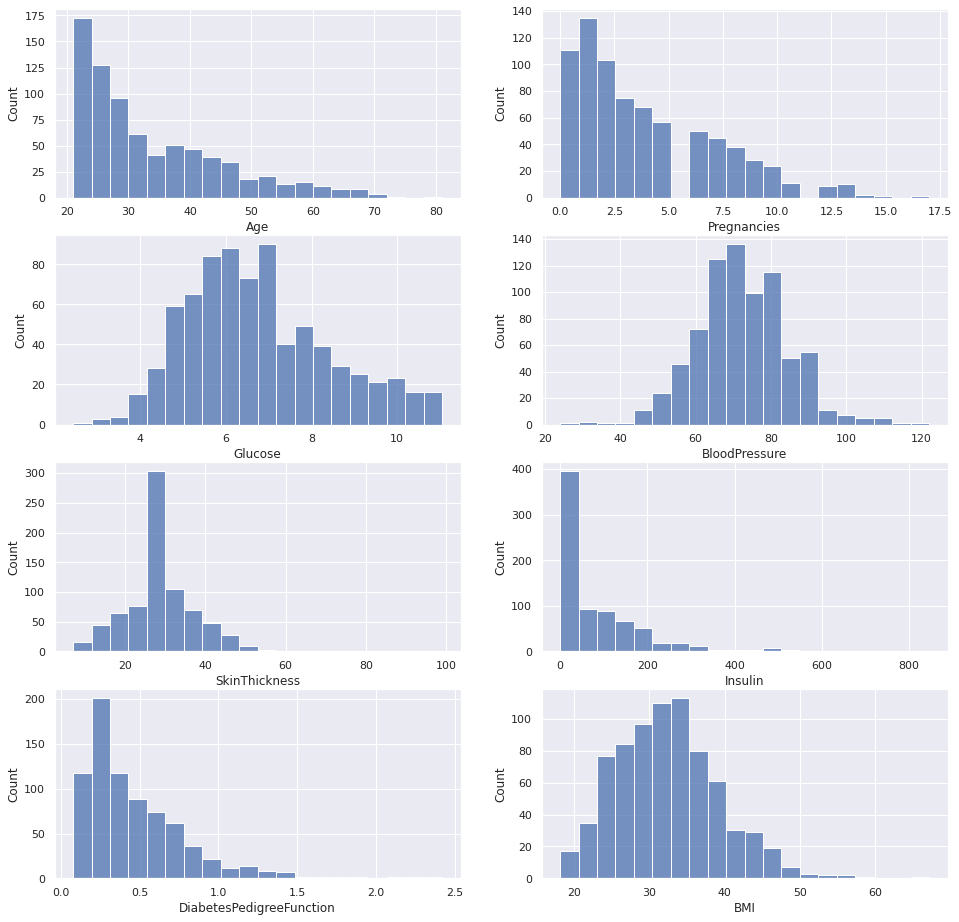

In [7]:
#Visualize data spread by creating a count for each category of data
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(pima_df.Age, bins = 20, ax=ax[0,0])
sns.histplot(pima_df.Pregnancies, bins = 20, ax=ax[0,1])
sns.histplot(pima_df.Glucose, bins = 20, ax=ax[1,0])
sns.histplot(pima_df.BloodPressure, bins = 20, ax=ax[1,1])
sns.histplot(pima_df.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(pima_df.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(pima_df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.histplot(pima_df.BMI, bins = 20, ax=ax[3,1])

Next, a correlation heatmap was created to see what variables seem to correlate most with the outcome. Based on the correlation map below, it seems that glucose has the highest correlation with outcome, followed by BMI, pregnancies, and Age. Blood Pressure and Skin Thickness don't appear to have much corelation with the outcome. This seems like a logical correlation.

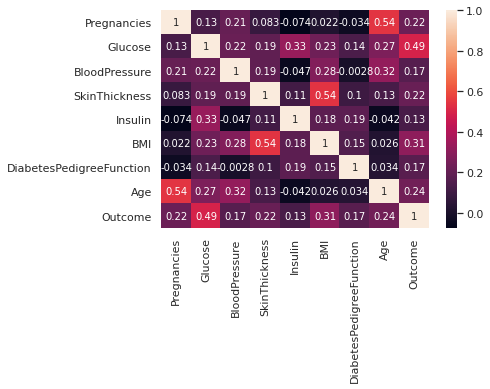

In [8]:
sns.heatmap(pima_df.corr(), annot=True)

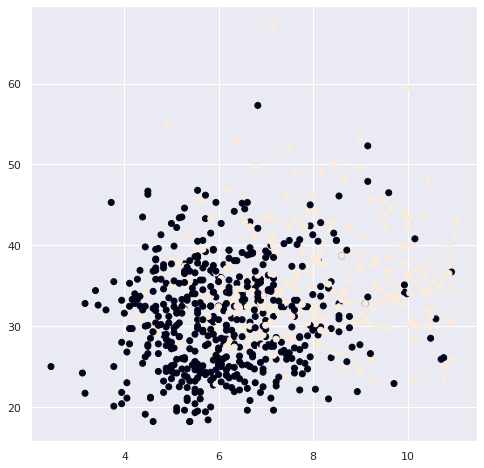

In [9]:
fig = plt.figure(figsize=(8,8))
plt.scatter(pima_df['Glucose'], pima_df['BMI'],c=pima_df['Outcome'])

# Preparing the data for Models

Prepare the Pima Indian data and write a function to perform 10-fold cross validation for scoring each model.

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [11]:
X = pima_df.drop('Outcome', axis = 1)
X_Glucose_BMI = pima_df[['Glucose', 'BMI']]
y = pima_df['Outcome']

def cv_10_fold(model,X1,y1):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, X1, y1, scoring='accuracy', cv=cv)
    #print('Accuracy: %.3f (std = %.3f)' % (np.mean(scores), np.std(scores)))
    return (np.mean(scores),np.std(scores))

Prepare German dataset for use in models.

In [12]:
X_german = german_df.drop('Outcome', axis = 1)
X_Glucose_BMI_german = german_df[['Glucose', 'BMI']]
y_german = german_df['Outcome']

# k Nearest Neighbor Regression

Perform KNN analysis on data (https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55). Start with Glucose and BMI as variables because these are the two that seem to have the most coorelation with the Outcome. Perform 10-fold cross validation. Then output the accuracy.

When running KNN for k = 1 to 100, the best accuracy I was able to get was 76.3% with a value of k = 31.

In [13]:
accuracies=[]
stds=[]
X_Glucose_BMI = pima_df[['Glucose', 'BMI']] 
for k in range(100):
    knn = KNeighborsClassifier(n_neighbors=k+1, metric='euclidean')
    (knn_acc, knn_std) = cv_10_fold(knn,X_Glucose_BMI,y)
    accuracies.append(knn_acc)
    stds.append(knn_std)
    
print("For KNN analysis:")
print("Accuracy is %.1f%% with a standard deviation of %.3f when k = %d" % (max(accuracies)*100, stds[accuracies.index(max(accuracies))], accuracies.index(max(accuracies))))


For KNN analysis:
Accuracy is 76.3% with a standard deviation of 0.038 when k = 31


Create two graphs to show the actual classification of the test data and the predicted classification using KNN.

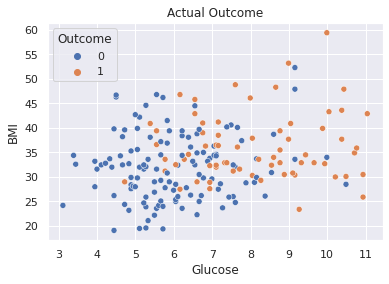

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_Glucose_BMI, y, random_state=1)
plt.title('Actual Outcome')
sns.scatterplot(
    x='Glucose',
    y='BMI',
    hue='Outcome',
    data=X_test.join(y_test, how='outer')
);

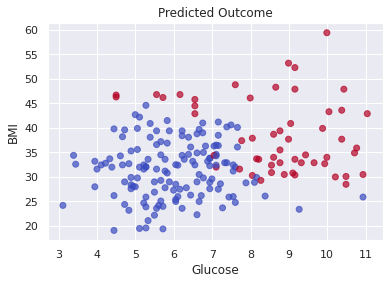

In [15]:
knn = KNeighborsClassifier(n_neighbors=accuracies.index(max(accuracies)), metric='euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
plt.title('Predicted Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.scatter(
    X_test['Glucose'],
    X_test['BMI'],
    c=y_pred_knn,
    cmap='coolwarm',
    alpha=0.7
);

With the German data as input, we get an accuracy of 76.1%

In [16]:
y_pred_knn_german = knn.predict(X_Glucose_BMI_german)

accuracy_knn_german = accuracy_score(y_german, y_pred_knn_german)
std_knn_german = np.std(y_pred_knn_german-y_german)
print("For KNN analysis:")
print("Accuracy with German data is %.1f%%" % (accuracy_knn_german*100))

For KNN analysis:
Accuracy with German data is 76.1%


# Logistic Regression

Perform logistic regression using only Glucose and BMI as variables. Got a testing accuracy of 75.9%

In [17]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train,y_train)
(lr_acc, lr_std) = cv_10_fold(model_lr,X_Glucose_BMI,y)

print("For Logistic Regression analysis:")
print("Accuracy is %.1f%% with a standard deviation of %.3f" % (lr_acc*100, lr_std))

For Logistic Regression analysis:
Accuracy is 75.9% with a standard deviation of 0.042


Test all varibles in logistic regression and see which ones affect the accuracy. Got an accuracy of 76.9% with Pregnancies, Glucose, Skin Thickness and BMI.

In [18]:
X_lr2 = pima_df[['Pregnancies','Glucose', 'SkinThickness','BMI']]
X_train_lr2, X_test_lr2, y_train_lr2, y_test_lr2 = train_test_split(X_lr2, y, random_state=1)

model_lr2 = LogisticRegression()
model_lr2.fit(X_train_lr2,y_train_lr2)
(lr2_acc, lr2_std) = cv_10_fold(model_lr2, X_lr2,y)

print("For Logistic Regression analysis:")
print("Accuracy is %.1f%% with a standard deviation of %.3f" % (lr2_acc*100, lr2_std))

For Logistic Regression analysis:
Accuracy is 76.9% with a standard deviation of 0.041


While the more complex model performs ever so slightly better than the simpler model, we cannot say much about how they compare without providing further data.

Next, we'll plug an additional dataset to the models and see how they perform.

In [19]:
from sklearn.metrics import mean_squared_error

print("Model 1")
y_pred_lr_german = model_lr.predict(X_Glucose_BMI_german)
print("MSE = %.3f" % mean_squared_error(y_german, y_pred_lr_german))
print("Testing Accuracy: %.3f" % accuracy_score(y_german, y_pred_lr_german))

print("Model 2")
y_pred_lr2_german = model_lr2.predict(german_df[['Pregnancies','Glucose', 'SkinThickness','BMI']])
print("MSE = %.3f" % mean_squared_error(german_df['Outcome'], y_pred_lr2_german))
print("Testing Accuracy: %.3f" % accuracy_score(german_df['Outcome'], y_pred_lr2_german))

Model 1
MSE = 0.247
Testing Accuracy: 0.752
Model 2
MSE = 0.223
Testing Accuracy: 0.777


As we can see, the performance is pretty close to the original dataset. It is safe to say that our linear model generalizes well.

# Random Forest

Perform random forest with 1000 decision trees and 10-fold cross validation to obtain an accuracy of 76.5%.

In [20]:
# Saving feature names for later use
pima_df_list = list(pima_df.columns)
pima_df_list.remove("Outcome")
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, random_state=1)
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train_rf, y_train_rf);
(rf_acc, rf_std) = cv_10_fold(rf,X,y)

print("For Random Forest analysis:")
print("Accuracy is %.1f%% with a standard deviation of %.3f" % (rf_acc*100, rf_std))

For Random Forest analysis:
Accuracy is 76.5% with a standard deviation of 0.058


Create visual representation of decision tree.

In [21]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = pima_df_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

For visualization purposes, create a decision tree figure with the level limited to 3.

In [22]:
# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train_rf, y_train_rf)
(rf_small_acc, rf_small_std) = cv_10_fold(rf_small,X,y)

print("For Random Forest analysis:")
print("Accuracy is %.1f%% with a standard deviation of %.3f" % (rf_small_acc*100, rf_small_std))
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = pima_df_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

For Random Forest analysis:
Accuracy is 75.1% with a standard deviation of 0.047


In [23]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(pima_df_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Glucose              Importance: 0.25
Variable: BMI                  Importance: 0.17
Variable: Age                  Importance: 0.13
Variable: DiabetesPedigreeFunction Importance: 0.12
Variable: BloodPressure        Importance: 0.09
Variable: Pregnancies          Importance: 0.08
Variable: SkinThickness        Importance: 0.08
Variable: Insulin              Importance: 0.07


Create simpler random forest using only two most important values (Glucose and BMI) to obtain an accuracy of 75.5%.

In [24]:
# New random forest with only the two most important variables
rf_most_important = RandomForestClassifier(n_estimators= 1000, random_state=42, max_depth = 3)
train_important = X_train_rf[['Glucose','BMI']]

# Train the random forest
rf_most_important.fit(train_important, y_train_rf);
(rf_most_important_acc, rf_most_important_std) = cv_10_fold(rf_most_important,train_important,y_train_rf)

print("For Random Forest with two most important features analysis:")
print("Accuracy is %.1f%% with a standard deviation of %.3f" % (rf_most_important_acc*100, rf_most_important_std))

For Random Forest with two most important features analysis:
Accuracy is 75.5% with a standard deviation of 0.082


In [25]:
# Extract tree
tree_most_important = rf_most_important.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_most_important, out_file = 'most_important_tree.dot', feature_names = ['Glucose','BMI'], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('most_important_tree.dot')
graph.write_png('most_important_tree.png');

Test the german data on the random forest with all features

In [26]:
import sklearn
german_df_list = list(german_df.columns)
german_df_list.remove("Outcome")
# Use the forest's predict method on the german data
predictions_german = rf.predict(X_german)
# Calculate the absolute errors
errors_german = abs(predictions_german - y_german)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_german), 2), 'degrees.')
# Calculate and display accuracy
accuracy_german = 100*sklearn.metrics.balanced_accuracy_score(y_german, predictions_german)
print('Accuracy:', round(accuracy_german, 2), '%.')

Mean Absolute Error: 0.06 degrees.
Accuracy: 93.46 %.


Test german data on random forest with 3 levels.

In [27]:
predictions_german_small = rf_small.predict(X_german)
# Calculate the absolute errors
errors_german_small = abs(predictions_german_small - y_german)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_german_small), 2), 'degrees.')
# Calculate and display accuracy
accuracy_german_small = 100*sklearn.metrics.balanced_accuracy_score(y_german, predictions_german_small)
print('Accuracy:', round(accuracy_german_small, 2), '%.')

Mean Absolute Error: 0.23 degrees.
Accuracy: 68.86 %.


Test german data on random forest with only two most important features (Glucose and BMI) and 3 levels.

In [28]:
X_german_important = X_german[['Glucose','BMI']]
# Make predictions and determine the error
predictions_german2 = rf_most_important.predict(X_german_important)
errors = abs(predictions_german2 - y_german)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
accuracy_german2 = 100*sklearn.metrics.balanced_accuracy_score(y_german,predictions_german2)
print('Accuracy:', round(accuracy_german2,2), '%.')

Mean Absolute Error: 0.22 degrees.
Accuracy: 73.0 %.


# Gradient Boosting

In this section we apply a novel classification technique, namely gradient boosting.
This technique is a subclass of boosting machine learning methods, which rely on iteratively finding and combining weak classifiers to form a combined well-performing classifier.
In gradient boosting, these classifiers are tree-based learners.

For finding the best possible classifier, we optimize the model's hyperparameters using grid search cross validation.

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

X, y = pima_df.drop('Outcome', axis=1), pima_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [30]:
# Articles about xgboost:
# https://www.datacamp.com/community/tutorials/xgboost-in-python
# https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/
# Optimal parameters from the following paper:
# https://bmcendocrdisord.biomedcentral.com/articles/10.1186/s12902-019-0436-6
model_params = {
    # Params from paper
    # Number of trees
    'n_estimators': 257,
    'learning_rate': 0.126,
    # Maximum depth of each tree during training
    'max_depth': 2,
    # Equivalent of n.minobsinnode in R
    'min_child_weight': 75,
    # For consistent results
    'seed': 2212,
}

xgb_model = xgb.XGBClassifier(**model_params)
parameters = {
    'objective': ['reg:squarederror'],
    'max_depth': range(2, 10, 1),
    'n_estimators': [100, 250, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.125]
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=False
)

grid_search.fit(X_train, y_train)

# Use the best estimator
xgb_model = grid_search.best_estimator_

print("Training accuracy = %f" % balanced_accuracy_score(xgb_model.predict(X_train), y_train))
print("Testing accuracy = %f" % balanced_accuracy_score(xgb_model.predict(X_test), y_test))

Training accuracy = 0.778351
Testing accuracy = 0.741952


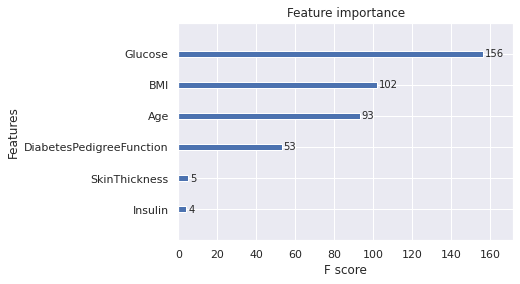

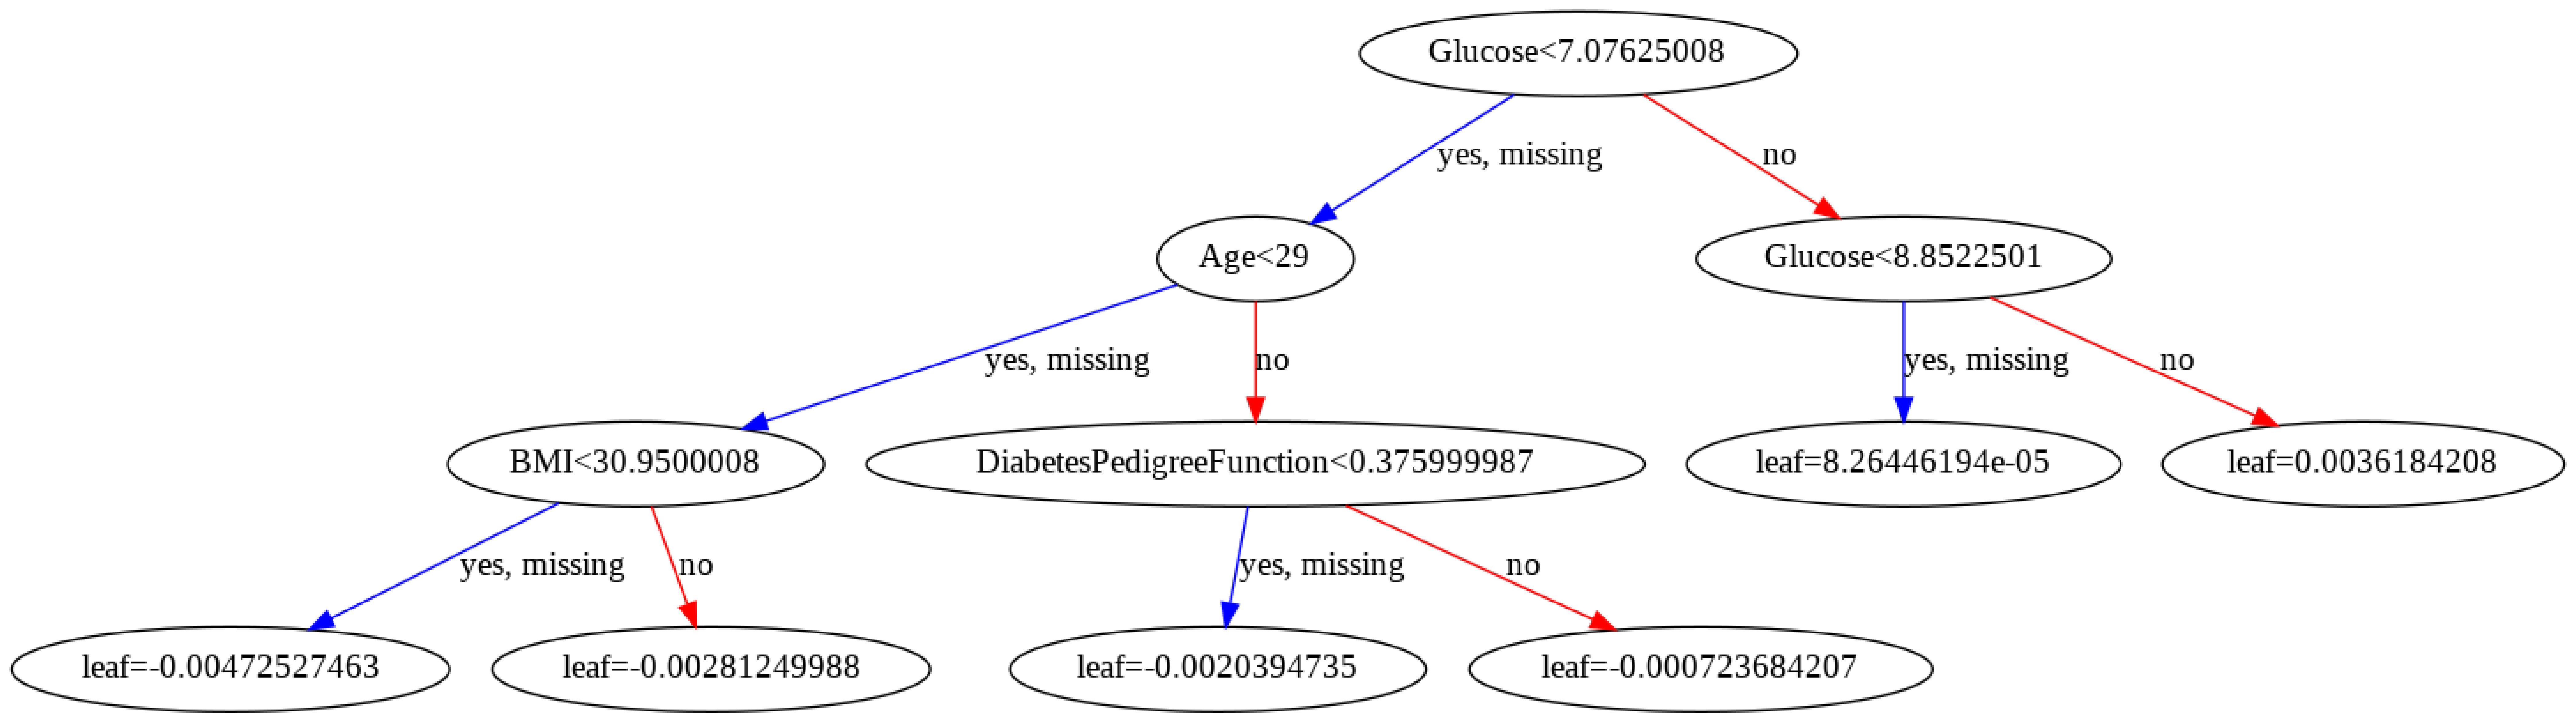

In [31]:
xgb.plot_importance(xgb_model)
xgb.plot_tree(xgb_model)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)

As per the initial analysis, we see that `Glucose` has the highest impact on the outcome of the diagnosis. Lets see how our model performs with the German dataset.

In [32]:
xgb_accuracy_german = balanced_accuracy_score(xgb_model.predict(german_df.drop('Outcome', axis=1)), german_df['Outcome'])
print("Accuracy on new data = %f" % xgb_accuracy_german)

Accuracy on new data = 0.766168


# Neural Networks

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
keras.backend.set_floatx('float64')

In the next cells, we're attempting to utilize neural networks for predicting diabetes within patients. As a reference, we're using a study conducted in 2018 which used neural networks for making similar predictions ([Predicting Diabetes Mellitus With Machine Learning Techniques](https://www.frontiersin.org/articles/10.3389/fgene.2018.00515/full)).

To find the best possible model, we use grid search cross validation with 10 folds.

In [ ]:
_, columns = X_train.shape

def build_model():
    # Good reference:
    # https://www.pluralsight.com/guides/deep-learning-model-perform-binary-classification
    model = Sequential()
    model.add(Dense(12, input_dim=columns, activation=tf.nn.relu))
    for _ in range(10):
        model.add(Dense(12, activation=tf.nn.relu))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'batch_size': [1, 10, 50, 100],
    'epochs': [100, 250, 500],
}
nn_model = KerasClassifier(build_fn=build_model, verbose=False)
grid = GridSearchCV(estimator=nn_model, param_grid=param_grid, n_jobs=10, cv=10)
grid_result = grid.fit(X_train, y_train)

nn_model = grid_result.best_estimator_

In [ ]:
y_hat = (nn_model.predict(X_train)>0.5).astype("int32")
print("Training accuracy : %f" % accuracy_score(y_train,y_hat))

y_hat = (nn_model.predict(X_test)>0.5).astype("int32")
print("Testing accuracy : %f" % accuracy_score(y_test,y_hat))

y_hat = (nn_model.predict(german_df.drop('Outcome', axis=1))>0.5).astype("int32")
print("Testing accuracy for german dataset : %f" % accuracy_score(german_df['Outcome'],y_hat))

We're able to achieve a relatively good accuracy with our model for both the Pima India dataset and the German dataset. So far, this is the highest accuracy we have seen in our data. 

In [ ]:
nn_model.get_params()